# Estimasi Harga Laptop

# Business Understanding

Laptop merupakan salah satu alat penunjang kegiatan yang paling sering digunakan dalam pekerjaan sehari - hari. Ada banyak tipe dan jenis laptop tergantung kebutuhan masing - masing. Harga dari setiap laptop pun berbeda - beda tergantung spesifikasi yang dibutuhkan. Hal itulah yang menjadi dasar untuk tujuan disini, yaitu untuk menentukan estimasi harga laptop yang ada dipasaran agar dapat membantu calon pengguna dalam mendapatkan laptop yang sesuai dengan kebutuhannya.

# Data Understanding

Dari file laptop_price.xlsx terdapat 11 kolom yang yang tipe datanya float dan object
 
 0   Company           1303 non-null   object 

 1   TypeName          1303 non-null   object 
 
 2   Inches            1303 non-null   float64
 
 3   ScreenResolution  1303 non-null   object 
 
 4   Cpu               1303 non-null   object 
 
 5   Ram               1303 non-null   object 
 
 6   Memory            1303 non-null   object 
 
 7   Gpu               1303 non-null   object 
 
 8   OpSys             1303 non-null   object 
 
 9   Weight            1303 non-null   object 
 
 10  Price_euros       1303 non-null   float64

# Data Preparation

Pada tahap ini data akan dibersihkan terlebih dahulu agar data dapat digunakan sebagai input dari aplikasi yang akan dibuat 

- Deskripsi library yang digunakan

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Memanggil dataset

In [187]:
df = pd.read_excel('laptop_price.xlsx')

- Deskripsi dataset

In [188]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [189]:
# Menghapus kolom product

df.drop(columns=['Product'],inplace=True)


In [190]:
# Info mengenai tipe data yang ada di tabel

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price_euros       1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


Karena ada beberapa kolom dengan tipe data object, maka akan diubah terlebih dahulu

In [191]:
# Mengubah nama kolom

df.rename(columns = {'Ram':'Ram_GB'}, inplace = True)
df.rename(columns = {'Weight':'Weight_KG'}, inplace = True)

In [192]:
# Menganti tipe data menjadi int dan float dan menghapus "kg" "GB" 

df['Weight_KG'] = df['Weight_KG'].str.replace('kg','')
df['Ram_GB'] = df['Ram_GB'].str.replace('GB','')

df["Ram_GB"] = df["Ram_GB"].astype(int)
df["Weight_KG"] = df["Weight_KG"].astype(float)

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram_GB            1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight_KG         1303 non-null   float64
 10  Price_euros       1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


In [194]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

Pada kolom ScreenResolution ada beberapa fitur yang tertulis seperti touchscreen dan layar IPS, maka akan dibuat kolom baru yaitu kolom Touchscreen dan kolom IPS

In [195]:
# Membuat kolom Touchscreen

df['TouchScreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

# 1 = Touchscreen
# 0 = No Touchscreen

df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen
1183,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 2GHz,4,500GB HDD,Intel HD Graphics 500,Windows 10,2.10,333.0,0
1035,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.26,1349.0,0
604,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M420,Linux,2.18,465.0,0
1205,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,AMD Radeon R7 M445,Windows 10,2.36,889.0,0
371,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,128GB SSD,AMD Radeon R5,Windows 10,2.10,426.0,0


In [196]:
# Membuat kolom IPS

df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

# 1 = Touchscreen
# 0 = No Touchscreen

df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS
609,Acer,Notebook,14.0,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,128GB Flash Storage,Intel HD Graphics 405,Windows 10,1.60,349.00,0,0
258,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.14,2499.00,0,0
728,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,1TB HDD,AMD Radeon R7 M445,Linux,2.32,589.52,0,0
406,Toshiba,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.20,1747.00,0,0
1187,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Nvidia GeForce 940MX,Windows 10,2.23,691.00,0,0


In [197]:
# Merapikan kolom ScreenResolution

df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])

df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS
1199,MSI,Gaming,17.3,1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.43,2048.9,0,0
857,HP,2 in 1 Convertible,13.3,1920x1080,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.28,2559.0,1,0
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.10,400.0,0,0
922,HP,Ultrabook,13.3,3200x1800,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.39,1149.0,1,0
918,Dell,Gaming,15.6,1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.60,1349.0,0,0


In [199]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

Karena ada banyak jenis Cpu, maka akan dibuat kolom baru yang berisi tipe Cpu apa yang digunakan, yaitu kolom Cpu_Name dan Cpu_Brand, dimana nanti kita akan menggunakan kolom Cpu_Brand kedepannya

In [200]:
# Membuat kolom Cpu_Name

df['Cpu_Name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [201]:
# Fungsi yang memilah Cpu

def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
        
df['Cpu_Brand']=df['Cpu_Name'].apply(fetch_processor)

df.sample(7)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,Cpu_Name,Cpu_Brand
224,Dell,Gaming,17.3,1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42,2456.34,0,1,Intel Core i7,Intel Core i7
1241,Asus,Ultrabook,13.3,1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.45,1280.00,0,0,Intel Core i7,Intel Core i7
903,Lenovo,Ultrabook,14.0,1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB Flash Storage,Intel HD Graphics 620,Windows 10,1.13,2049.00,0,1,Intel Core i7,Intel Core i7
937,MSI,Gaming,15.6,1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,1199.00,0,0,Intel Core i7,Intel Core i7
355,Dell,Notebook,15.6,1920x1080,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.02,970.90,0,0,Intel Core i7,Intel Core i7
285,Acer,Notebook,15.6,1920x1080,Intel Core i7 7500U 2.7GHz,12,1TB HDD,Intel HD Graphics 620,Windows 10,2.15,659.00,1,1,Intel Core i7,Intel Core i7
779,Asus,Notebook,15.6,1920x1080,Intel Pentium Dual Core N4200 1.1GHz,8,128GB SSD,Intel HD Graphics 505,Windows 10,2.00,581.90,0,0,Intel Pentium Dual,Other Intel Processor


In [202]:
# Menghapus kolom Cpu dan Cpu_Name

df.drop(columns=['Cpu','Cpu_Name'],inplace=True)

df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,Cpu_Brand
166,Acer,Notebook,15.6,1366x768,4,1TB HDD,Intel HD Graphics 505,Windows 10,2.10,363.51,0,0,Other Intel Processor
494,Asus,Gaming,17.3,1920x1080,24,256GB SSD + 1TB HDD,Nvidia GeForce GTX 965M,Windows 10,4.33,1269.00,1,1,Intel Core i7
377,Dell,Notebook,15.6,1366x768,4,500GB HDD,Intel HD Graphics 400,Windows 10,1.80,309.00,0,0,Other Intel Processor
469,Lenovo,Ultrabook,14.0,2560x1440,12,256GB SSD,Intel HD Graphics 520,Windows 10,1.40,1858.00,0,1,Intel Core i7
707,Lenovo,Workstation,15.6,1920x1080,16,512GB SSD,Nvidia Quadro M520M,Windows 7,2.18,1855.00,0,0,Intel Core i7


In [203]:
# Fungsi yang memilah memori 

df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

df

C:\Users\Asus\AppData\Local\Temp\ipykernel_11352\2674249516.py:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
C:\Users\Asus\AppData\Local\Temp\ipykernel_11352\2674249516.py:27: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


,Company,TypeName,Inches,ScreenResolution,Ram_GB,Memory,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,Cpu_Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,1920x1080,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,1,1,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,13.3,3200x1800,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,1,1,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,14.0,1366x768,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,0,0,Other Intel Processor,0,0,0,64
1301,HP,Notebook,15.6,1366x768,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,0,0,Intel Core i7,1000,0,0,0


In [204]:
# Menghapus kolom memori

df.drop(columns=['Memory'],inplace=True)

In [205]:
# Menghapua kolom Hybrid dan Flash Storage

df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [206]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

Selanjutnya data Gpu akan diolah menjadi 3 kategori berdasarkan merknya  

In [207]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [208]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Ram_GB,Gpu,OpSys,Weight_KG,Price_euros,TouchScreen,IPS,Cpu_Brand,HDD,SSD,Gpu brand
1272,Lenovo,Notebook,14.0,1366x768,2,Intel HD Graphics,Windows 10,1.50,229.00,0,0,Other Intel Processor,0,0,Intel
1100,Dell,Ultrabook,12.5,1366x768,4,Intel HD Graphics 520,Windows 7,1.50,1135.15,0,0,Intel Core i3,500,0,Intel
1123,Dell,Notebook,15.6,1366x768,4,Intel HD Graphics 520,Linux,2.09,523.63,0,0,Intel Core i5,500,0,Intel
741,Dell,Notebook,15.6,1366x768,8,Intel HD Graphics 520,Windows 10,2.00,665.00,0,0,Intel Core i3,0,256,Intel
699,HP,Notebook,15.6,1920x1080,4,AMD Radeon 530,Windows 10,2.10,689.00,0,1,Intel Core i7,500,0,AMD


In [209]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [210]:
# Menghapus Gpu Merk ARM karena hanya ada satu

df = df[df['Gpu brand'] != 'ARM']


In [211]:
# Menghapus kolom Gpu 

df.drop(columns=['Gpu'],inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_11352\3024544522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'],inplace=True)


In [212]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

Selanjutnya akan dibuat fungsi untuk memilah sistem operasi apa yang digunakan oleh laptop

In [213]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [214]:
df['OS'] = df['OpSys'].apply(cat_os)


C:\Users\Asus\AppData\Local\Temp\ipykernel_11352\1911865273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OS'] = df['OpSys'].apply(cat_os)


In [215]:
# Menghapus kolom OpSys (dan diganti menjadi kolom OS)

df.drop(columns=['OpSys'],inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_11352\2607282747.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'],inplace=True)


In [216]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Ram_GB,Weight_KG,Price_euros,TouchScreen,IPS,Cpu_Brand,HDD,SSD,Gpu brand,OS
314,Asus,2 in 1 Convertible,11.6,1366x768,2,1.10,275.00,1,0,Other Intel Processor,0,0,Intel,Windows
460,Acer,Notebook,15.6,1920x1080,4,2.23,544.00,0,0,Intel Core i3,1000,0,Nvidia,Windows
1116,Lenovo,Gaming,17.3,1920x1080,16,4.60,2749.99,0,1,Intel Core i7,0,256,Nvidia,Windows
501,HP,Notebook,15.6,1366x768,8,1.91,618.99,0,0,Intel Core i5,0,256,AMD,Windows
489,Asus,Ultrabook,12.5,1920x1080,16,0.91,1950.00,0,0,Intel Core i7,0,512,Intel,Windows


# Modelling

<Axes: >

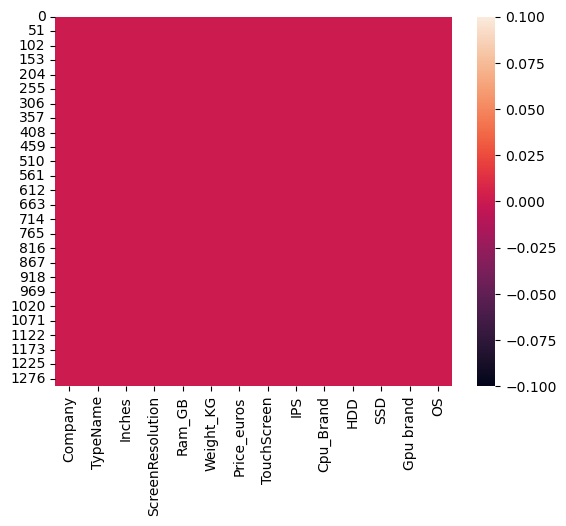

In [217]:
sns.heatmap(df.isnull())

In [218]:
df.describe()

,Inches,Ram_GB,Weight_KG,Price_euros,TouchScreen,IPS,HDD,SSD
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.00000,1302.000000,1302.000000
mean,15.019278,8.385561,2.039416,1124.043894,0.146697,0.27957,414.101382,183.874040
std,1.424861,5.085166,0.665274,699.158856,0.353940,0.44896,515.889348,186.969314
min,10.100000,2.000000,0.690000,174.000000,0.000000,0.00000,0.000000,0.000000
25%,14.000000,4.000000,1.500000,599.000000,0.000000,0.00000,0.000000,0.000000
50%,15.600000,8.000000,2.040000,978.000000,0.000000,0.00000,0.000000,256.000000
75%,15.600000,8.000000,2.300000,1488.435000,0.000000,1.00000,1000.000000,256.000000
max,18.400000,64.000000,4.700000,6099.000000,1.000000,1.00000,2000.000000,1024.000000


- Visualisasi Data

C:\Users\Asus\AppData\Local\Temp\ipykernel_11352\2675538813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

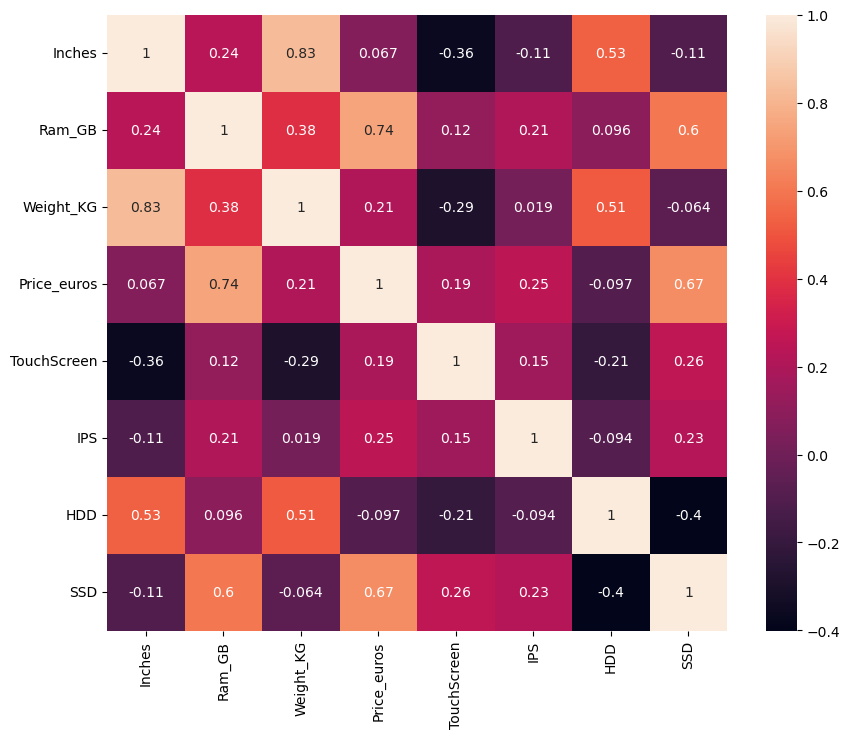

In [219]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

- Jumlah laptop berdasarkan merk

In [220]:
Merk = df.groupby('Company').count()[['Price_euros']].sort_values(by='Price_euros',ascending=True).reset_index()
Merk = models.rename(columns={'Price_euros':'numberOfLaptops'})

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'Toshiba'),
  Text(2, 0, 'MSI'),
  Text(3, 0, 'Acer'),
  Text(4, 0, 'Asus'),
  Text(5, 0, 'HP'),
  Text(6, 0, 'Dell'),
  Text(7, 0, 'Lenovo')])

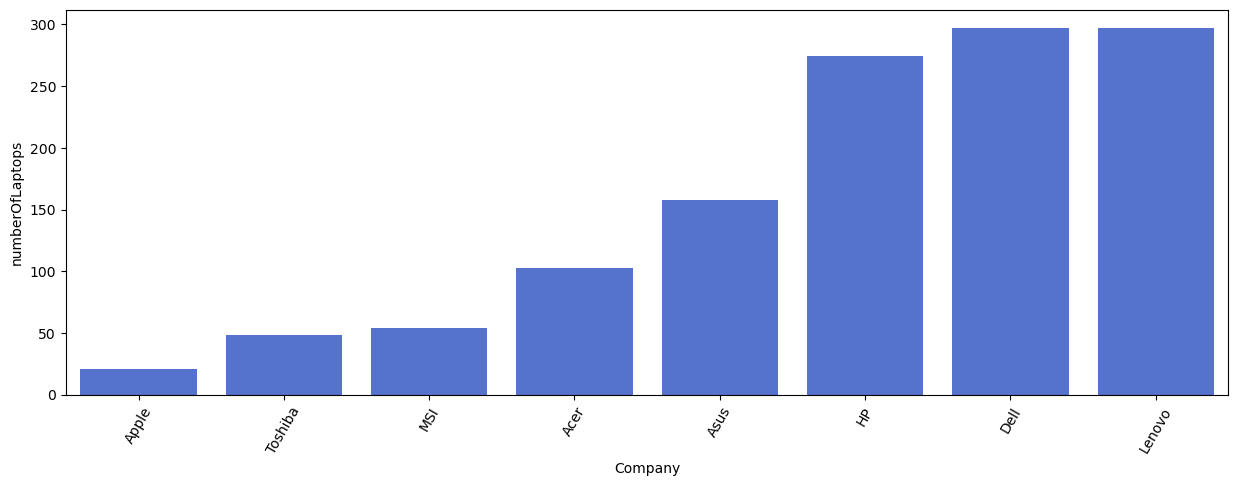

In [221]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=Merk['Company'], y=Merk['numberOfLaptops'], color='royalblue')
plt.xticks(rotation=60)

- Jumlah laptop berdasarkan memori HDD

In [222]:
Memori= df.groupby('HDD').count()[['Price_euros']].sort_values(by='Price_euros').reset_index()
Memori = Memori.rename(columns={'Price_euros':'count'})

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, '32'),
  Text(2, 0, '128'),
  Text(3, 0, '500'),
  Text(4, 0, '1000'),
  Text(5, 0, '2000')])

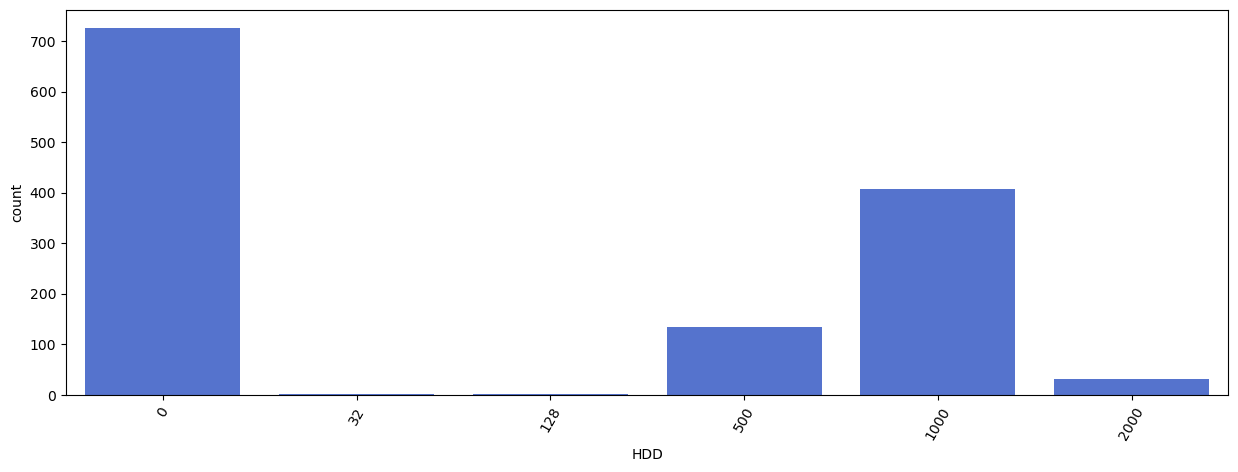

In [223]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=Memori['HDD'], y=Memori['count'], color='royalblue')
plt.xticks(rotation=60)

- Jumlah laptop berdasarkan memori SSD

In [224]:
Memori= df.groupby('SSD').count()[['Price_euros']].sort_values(by='Price_euros').reset_index()
Memori = Memori.rename(columns={'Price_euros':'count'})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '0'),
  Text(1, 0, '8'),
  Text(2, 0, '16'),
  Text(3, 0, '32'),
  Text(4, 0, '64'),
  Text(5, 0, '128'),
  Text(6, 0, '180'),
  Text(7, 0, '240'),
  Text(8, 0, '256'),
  Text(9, 0, '512'),
  Text(10, 0, '768'),
  Text(11, 0, '1000'),
  Text(12, 0, '1024')])

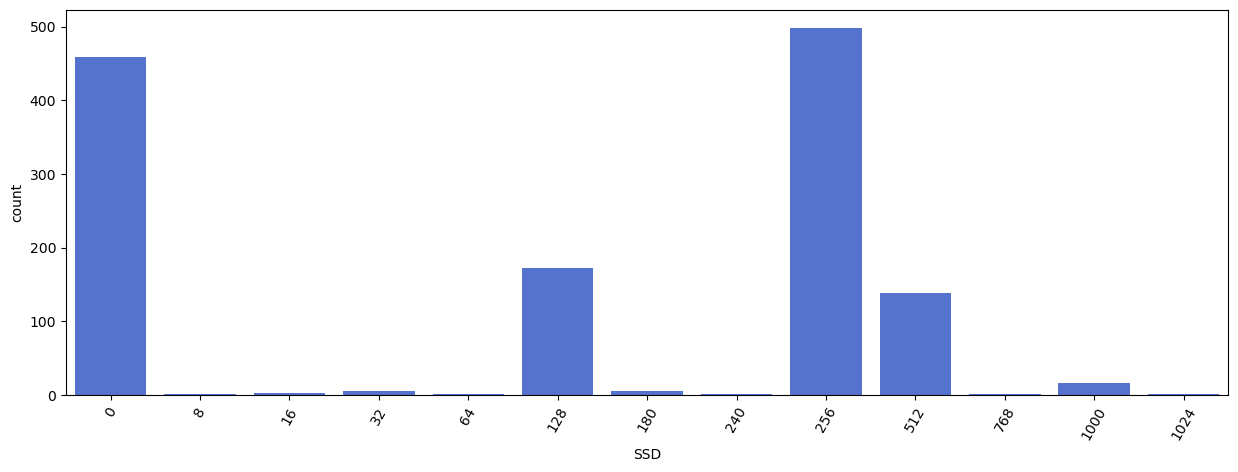

In [225]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=Memori['SSD'], y=Memori['count'], color='royalblue')
plt.xticks(rotation=60)

- Distribusi SSD

C:\Users\Asus\AppData\Local\Temp\ipykernel_11352\2738201030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ram_GB'])


<Axes: xlabel='Ram_GB', ylabel='Density'>

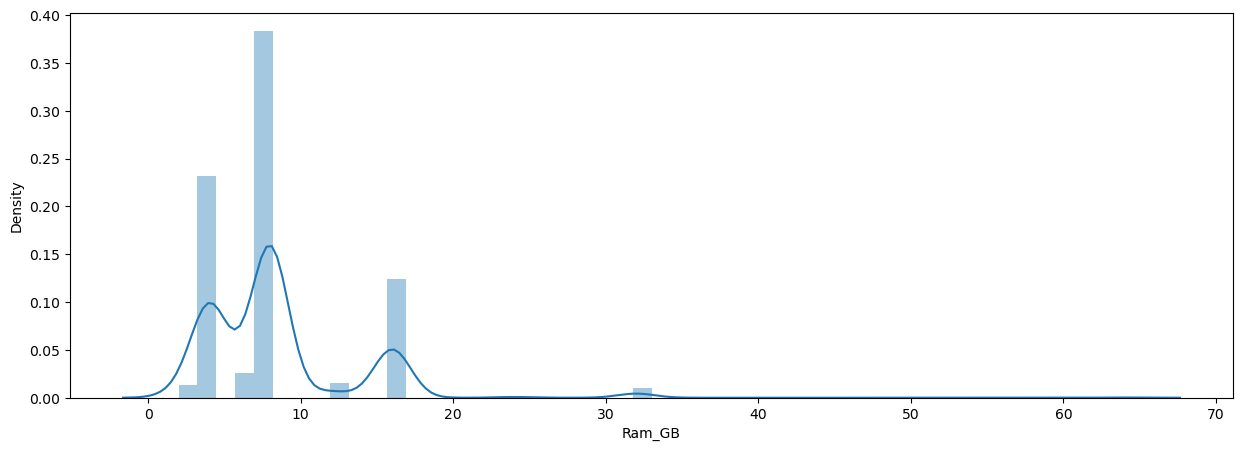

In [226]:
plt.figure(figsize=(15,5))
sns.distplot(df['Ram_GB'])

- Distribusi harga

C:\Users\Asus\AppData\Local\Temp\ipykernel_11352\178916287.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price_euros'])


<Axes: xlabel='Price_euros', ylabel='Density'>

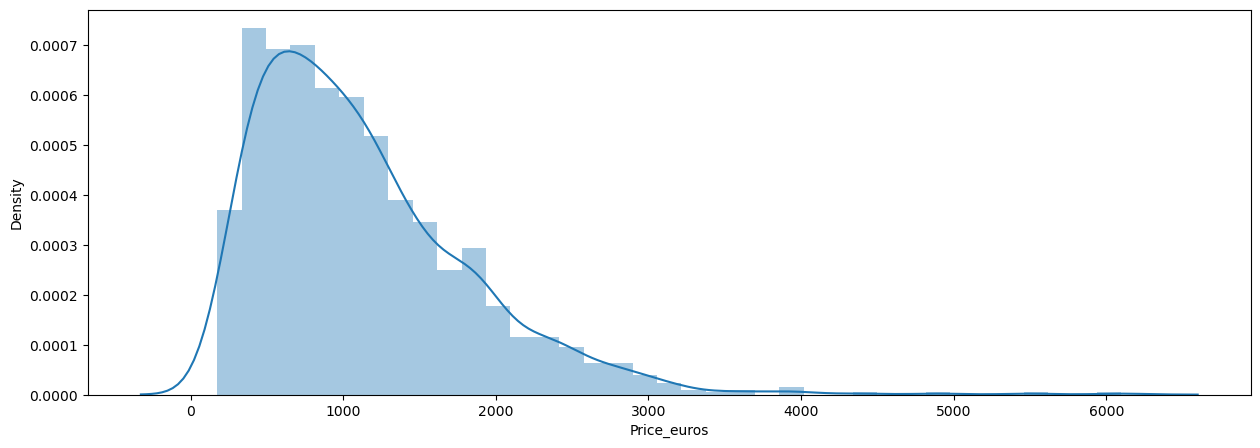

In [227]:
plt.figure(figsize=(15,5))
sns.distplot(df['Price_euros'])

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1302 non-null   object 
 1   TypeName          1302 non-null   object 
 2   Inches            1302 non-null   float64
 3   ScreenResolution  1302 non-null   object 
 4   Ram_GB            1302 non-null   int32  
 5   Weight_KG         1302 non-null   float64
 6   Price_euros       1302 non-null   float64
 7   TouchScreen       1302 non-null   int64  
 8   IPS               1302 non-null   int64  
 9   Cpu_Brand         1302 non-null   object 
 10  HDD               1302 non-null   int64  
 11  SSD               1302 non-null   int64  
 12  Gpu brand         1302 non-null   object 
 13  OS                1302 non-null   object 
dtypes: float64(3), int32(1), int64(4), object(6)
memory usage: 147.5+ KB


- Seleksi Fitur

In [230]:
features = ['Ram_GB','Weight_KG','TouchScreen','IPS', 'HDD', 'SSD']
x = df[features]
y = df['Price_euros']
x.shape, y.shape

((1302, 6), (1302,))

- Split data training dan data testing

In [231]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(326,)

- Membuat model regresi linier

In [232]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)


In [233]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linier = ', score)

akurasi model regresi linier =  0.6285673096011843


# Evaluation

- Membuat inputan model regresi linier


In [234]:
#['Ram(GB)','Weight(KG)','TouchScreen','IPS', 'HDD', 'SSD']
input_data = np.array([[8,15.4,0,1,0,512]])

prediction = lr.predict(input_data)
print('Estimasi harga Laptop dalam euro :', prediction)

Estimasi harga Laptop dalam euro : [2679.96393882]


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


- Save model

In [235]:
import pickle

filename = 'estimasi_laptop_price.sav'
pickle.dump(lr,open(filename,'wb'))